In [4]:
import numpy as np
import matplotlib.pylab as plt

In [9]:
def f(x_v, t):
        x = x_v[0]
        v = x_v[1]
        dx = v
        dv = -delta*v - alpha*x - beta*x**3 + gamma*np.cos(omega*t)
        return np.array([dx,dv])

def rk4_duff(x_v, delta, alpha, beta, gamma, omega, mass, num_Poincare, h):
    
    T = 2*np.pi/omega
    t1, t2 = 0, T*num_Poincare

    t_points = np.arange(t1, t2, h)
    x_points= []
    v_points= []
    poincare_x= []
    poincare_v = []

    
    x_v = np.array(x_v,float)
    
    for t in t_points:    
        x = x_v[0]
        v = x_v[1]
        x_points.append(x)
        v_points.append(v)
        
        if (t%T)<h:
            poincare_x.append(x_v[0])
            poincare_v.append(x_v[1])

        k1 = f(x_v,t)
        k2 = f(x_v+h/2*k1, t+h/2)
        k3 = f(x_v+h/2*k2, t+h/2)
        k4 = f(x_v+h*k3,t+h)
        x_v += h/6*(k1+2*k2+2*k3+k4)
    
    
    x_points = np.array(x_points)
    v_points = np.array(v_points)
    poincare_x = np.array(poincare_x)
    poincare_v = np.array(poincare_v)

    return t_points,x_points, v_points, poincare_x, poincare_v
        

224400


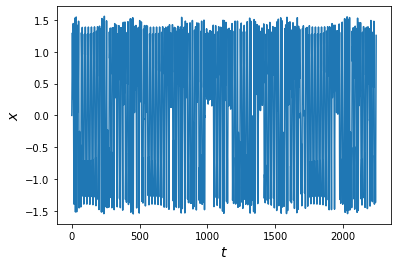

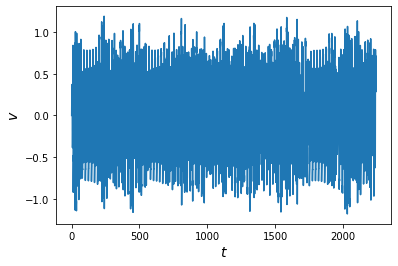

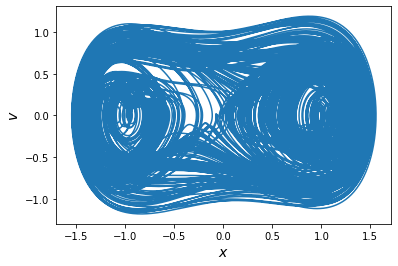

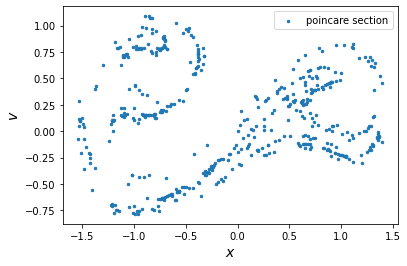

In [55]:
x_v = [0,0]
delta = 0.1
alpha = -1 
beta = 1
gamma = 0.35
omega = 1.4
mass = 1 
num_Poincare = 500
h = 0.01

t_points,x_points, v_points, poincare_x, poincare_v = rk4_duff(x_v, delta, alpha, beta, gamma, omega, mass, num_Poincare, h)

print(len(t_points))
plt.plot(t_points,x_points)
plt.xlabel('$t$',size='14')
plt.ylabel('$x$',size='14')
plt.show()

plt.plot(t_points,v_points)
plt.xlabel('$t$',size='14')
plt.ylabel('$v$',size='14')
plt.show()

plt.plot(x_points[:],v_points[:])
plt.xlabel('$x$',size='14')
plt.ylabel('$v$',size='14')
plt.show()

plt.scatter(poincare_x,poincare_v,label='poincare section',s=6)
plt.xlabel('$x$',size='14')
plt.ylabel('$v$',size='14')
plt.legend()
plt.show()